# Purpose: To obtain a Multiresolution Histogram of the Raw Image (full function and a step-by-step)

This example notebook walks the user through how to apply a histogram to an image. The example uses a raw image. However, this process can be done on any transformed image as well as seen in the fourier-transform with multi-resolution histogram example notebook.

*Step 1: Importing necessary packages*

In order to use this example notebook two non-RockstarLifestyle packages are needed and one RockstarLifestyle package is needed.

*Non-Rock

In [1]:
import sys
sys.path.append('/Users/HawleyHelm/Desktop/CHE_545_546/Rockstar-Lifestyle')

In [2]:
from PIL import Image, ImageFilter
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from RockstarLifestyle import MultiresHist as mult

*Step 2: Defining Constants*

In [3]:
#List of the number of bins you want for the histograms
bin_list = [3]

#List for the gaussian blur sigma variable
gauss_blur_list = [0,1] #Funciton only works for two gauss blurs currently

*Step 2: Saving the image*

In [5]:
# Opens the image and saves as a variable the convert ('L') allows us to convert to greyscale
im =  Image.open("Test_Photo_fromMike.png")

*Step 3:Splitting the image by r, g, b colors*

In [6]:
r,g,b = im.split()

In [7]:
g.save('g.png')
img = Image.open('g.png').convert('L')

# All-in-One

*Function Steps:*

Step 1: Converts an input image to a numpy array
Step 2: Applies gaussian blur according to input sigmas
Step 3: Creates normed, cumulative histograms based on provided Bin numbers
Step 4: Calculates heights of the difference histogram
Step 5: Produces the final difference histogram

*Function Inputs*
Input1: image = image to bre processed
Input2: bin_list = bins to be used for cumulative histogram
Input3: gauss_blur_list = list of sigma values to be used for creating blurred images

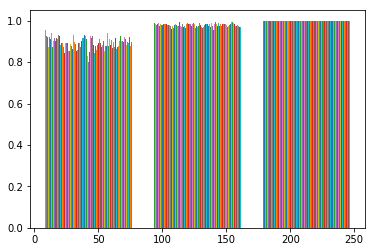

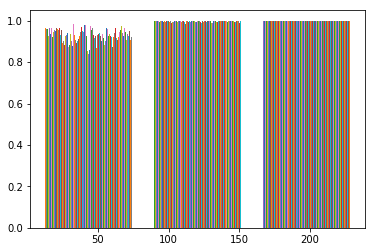

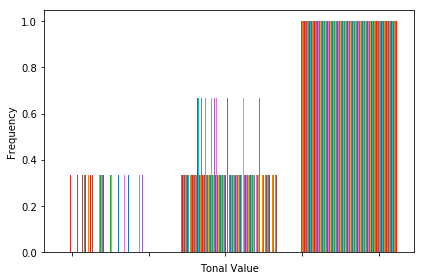

In [8]:
mult.Multi_res_hist_full(img, bin_list, gauss_blur_list)

# Step-By-Step

*Step 1: Converts the image to an numpy array*

In [9]:
arr = np.array(img)

*Step 2: Obtains gaussian blurs based on input list of the image*

In [10]:
gauss_blur_images = mult.gauss_filter(arr, gauss_blur_list)

*Step 3: Obtaining histograms of the images*

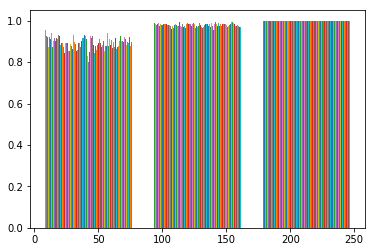

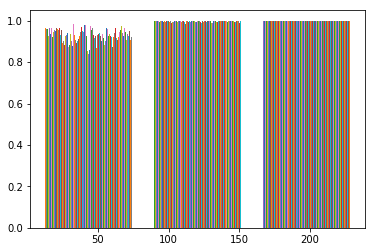

In [11]:
cumulative_Histograms = mult.cumulative_hist(gauss_blur_images, bin_list)

*Step 4: Saves these cumulative_histograms as two separate plots*

In [12]:
plt1=cumulative_Histograms[0]
plt2=cumulative_Histograms[1]

*Step 6: Computing heights for difference histogram*

In [13]:
#Function that takes the two histograms obtain heights for new histogram
heights = mult.diff_hist(plt1, plt2)

*Step 7: Making histogram of the new heights*

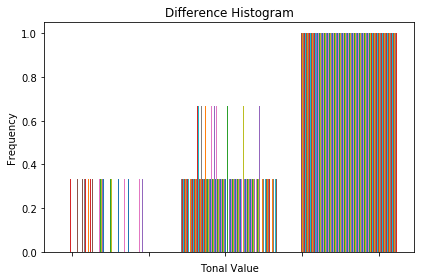

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(111) 

ax1.hist(heights, bins=3, density = True, cumulative = True)
ax1.set_xlabel('Tonal Value')
ax1.set_ylabel('Frequency')
ax1.set_xticklabels([])
ax1.set_title('Difference Histogram')

fig.tight_layout()